In [1]:
import pandas as pd
import numpy as np
import numpy as np
import math
import matplotlib
import pandas as pd
import seaborn as sns
import time
from datetime import date, datetime,timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.metrics import r2_score
from tqdm import tqdm_notebook
import talib

In [2]:
import os
os.getcwd()
os.chdir("D:\\NagarajLearning\\DataScience\\DataSets")
os.getcwd()

'D:\\NagarajLearning\\DataScience\\DataSets'

In [3]:
df_s= pd.read_excel("NSE 2018 data.xlsx")
df_s.head()

,SYMBOL,sector,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
0,20MICRONS,Mining,58.95,60.70,57.90,58.75,156506,9316661.05,2018-01-01,1527
1,20MICRONS,Mining,58.75,60.55,57.65,58.05,173946,10190754.15,2018-01-02,994
2,20MICRONS,Mining,58.70,60.50,58.50,59.20,191320,11345473.80,2018-01-03,1004
3,20MICRONS,Mining,59.45,63.20,58.60,62.60,812025,50057113.35,2018-01-04,5189
4,20MICRONS,Mining,64.80,67.00,63.00,63.60,1129498,73646779.85,2018-01-05,7645


In [4]:
pd.options.display.max_rows = 2000
print(df_s.groupby("sector")['SYMBOL'].count())

sector
Agro                                    2365
Air Conditioners                         215
Aluminium                                645
Appliances                               899
Auto                                    3006
Auto Ancl                              11932
Banks - PSU                             4515
Banks - Private                         3587
Beverages                               1192
Cables                                  1701
Castings                                 969
Cement                                  5047
Ceramics                                1290
Chemicals                               7356
Cigarettes                               645
Coke                                      58
Commodities                              537
Compressors                              645
Computers                              12953
Construction                           12665
Consumer Goods                          2078
Couriers                                 430
Div

In [7]:
pd.options.display.max_rows = 2000
print(df_s.groupby("sector")['SYMBOL'].count())

sector
Agro                                    2365
Air Conditioners                         215
Aluminium                                645
Appliances                               899
Auto                                    3006
Auto Ancl                              11932
Banks - PSU                             4515
Banks - Private                         3587
Beverages                               1192
Cables                                  1701
Castings                                 969
Cement                                  5047
Ceramics                                1290
Chemicals                               7356
Cigarettes                               645
Coke                                      58
Commodities                              537
Compressors                              645
Computers                              12953
Construction                           12665
Consumer Goods                          2078
Couriers                                 430
Div

In [92]:
df_all = df_s.query("sector=='Finance'")

In [93]:
df_all['date'] =  pd.to_datetime(df_all['TIMESTAMP'])

In [94]:
def calculate_COV(datasetName,df,col):
    stdev = df[col].std()
    mean = df[col].mean()
    cov= float(std/mean)
    df_datasets_stat[datasetName]=stdev,mean,cov

In [95]:
df_datasets_stat = pd.DataFrame([['stdev'],['mean'],['coef_variance']],columns=["stats"])

In [96]:
excluded_stocks = []
for i in df_all.SYMBOL.unique():
    df =  df_all[df_all.SYMBOL.isin([i])].copy()
    rows=df.shape[0]
    if(rows != 215):
        excluded_stocks.append(i)
        

In [97]:
excluded_stocks

['ALMONDZ',
 'ARIHANT',
 'CAPF',
 'CONSOFINVT',
 'DBSTOCKBRO',
 'HBSTOCK',
 'IBVENTURES',
 'IITL',
 'INDBANK',
 'INVENTURE',
 'KEYCORPSER',
 'KHANDSE',
 'NSIL',
 'SILINV',
 'STEL',
 'SUNDARMFIN']

In [98]:
df_Ex = df_all[~df_all.SYMBOL.isin(excluded_stocks)].copy()

In [99]:
df_Ex.SYMBOL.unique()

array(['ALANKIT', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BFINVEST',
       'CANFINHOME', 'CGCL', 'CHOLAFIN', 'DHFL', 'DHUNINV', 'EDELWEISS',
       'EMKAY', 'GICHSGFIN', 'GRUH', 'HDFC', 'IBULHSGFIN', 'IDFC', 'IFCI',
       'IIFL', 'INDOTHAI', 'IVC', 'JMFINANCIL', 'JPOLYINVST', 'JSWHL',
       'KICL', 'L&TFH', 'LICHSGFIN', 'M&MFIN', 'MAGMA', 'MANAPPURAM',
       'MOTILALOFS', 'MUTHOOTCAP', 'MUTHOOTFIN', 'NAGREEKCAP', 'NAHARCAP',
       'NETWORK18', 'PFC', 'PNBGILTS', 'PRIMESECU', 'RADICO',
       'RANEHOLDIN', 'RECLTD', 'RELCAPITAL', 'SREINFRA', 'SRTRANSFIN',
       'SUMMITSEC', 'TATAINVEST', 'TCIFINANCE', 'TFCILTD', 'VHL',
       'VLSFINANCE'], dtype=object)

In [100]:
for i in df_Ex.SYMBOL.unique():
    df = df_Ex[df_Ex.SYMBOL.isin([i])].copy()
    stdev = df['CLOSE'].std()
    mean = df['CLOSE'].mean()
    cov= float(stdev/mean)
    df_datasets_stat[i]=stdev,mean,cov

In [101]:
df_datasets_stat.index = df_datasets_stat.stats
df_datasets_stat.drop('stats',axis=1,inplace=True)

In [102]:
df_datasets_stat

,ALANKIT,BAJAJFINSV,BAJAJHLDNG,BAJFINANCE,BFINVEST,CANFINHOME,CGCL,CHOLAFIN,DHFL,DHUNINV,...,RECLTD,RELCAPITAL,SREINFRA,SRTRANSFIN,SUMMITSEC,TATAINVEST,TCIFINANCE,TFCILTD,VHL,VLSFINANCE
stats,,,,,,,,,,,,,,,,,,,,,
stdev,16.605923,620.560652,170.386655,363.684151,46.909009,81.570901,17.356623,152.597475,171.051042,69.886393,...,17.358991,103.034461,23.071716,165.424964,187.944549,59.261833,5.273491,13.595721,991.528546,11.382944
mean,33.400930,5836.804419,2853.230000,2230.658605,284.490233,352.576744,102.076279,1406.635581,496.378372,334.687442,...,119.220465,381.839070,61.557674,1332.127209,780.319070,805.010930,22.767674,143.711163,3216.813256,71.246047
coef_variance,0.497169,0.106319,0.059717,0.163039,0.164888,0.231356,0.170036,0.108484,0.344598,0.208811,...,0.145604,0.269837,0.374798,0.124181,0.240856,0.073616,0.231622,0.094604,0.308233,0.159769


In [103]:
df_cluster = df_datasets_stat.transpose()

In [104]:
df_cluster.head()

stats,stdev,mean,coef_variance
ALANKIT,16.605923,33.400930,0.497169
BAJAJFINSV,620.560652,5836.804419,0.106319
BAJAJHLDNG,170.386655,2853.230000,0.059717
BAJFINANCE,363.684151,2230.658605,0.163039
BFINVEST,46.909009,284.490233,0.164888


In [105]:
from sklearn.preprocessing import Normalizer


normalizer = Normalizer() # Define a Normalizer
normalized = normalizer.fit_transform(df_cluster)

In [106]:
df_norm = pd.DataFrame(normalized,columns=df_cluster.columns,index = df_cluster.index)

In [107]:
df_norm.head()

stats,stdev,mean,coef_variance
ALANKIT,0.445145,0.895359,0.013327
BAJAJFINSV,0.105723,0.994396,0.000018
BAJAJHLDNG,0.059611,0.998222,0.000021
BAJFINANCE,0.160914,0.986968,0.000072
BFINVEST,0.162691,0.986677,0.000572


In [108]:
from sklearn.cluster import KMeans

In [111]:
ssq = []

for k in range(1,12):
    kmodel = KMeans(n_clusters=k,random_state=113)
    kmodel.fit(df_norm)
    ssq.append(kmodel.inertia_)

In [113]:
print(ssq)

[0.476146160421661, 0.16314608404353897, 0.07420177995437495, 0.04144366184237697, 0.022839576082318375, 0.015369278153780083, 0.009462041680151892, 0.0072800203766914835, 0.005668215182544304, 0.004113476028383088, 0.0032983132689437217]


Text(4, 0.2, 'optimum number of clusters= 4')

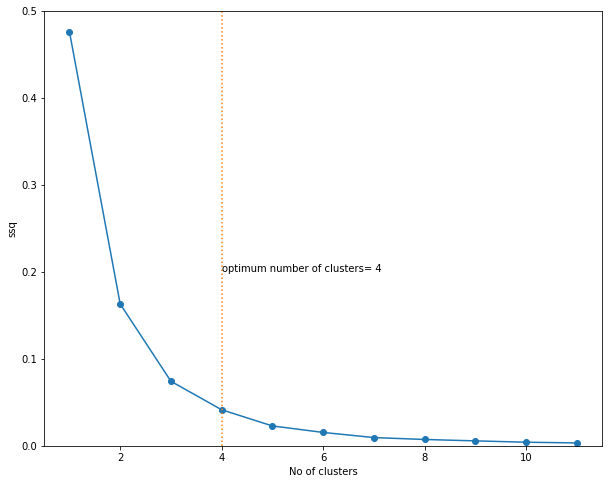

In [141]:
#Plotting the scree plot to find the k / Elbow poin
plt.plot(range(1,12),ssq,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('ssq')
plt.plot([4]*11,range(0,11),':')
plt.ylim(0,.5)
plt.text(4,.2,"optimum number of clusters= 4")
# plt.show()

In [145]:
kmodel = KMeans(n_clusters=4,random_state=113)
kmodel.fit(df_norm)

KMeans(n_clusters=4, random_state=113)

In [146]:
predicted_cluster = kmodel.predict(df_norm)

In [147]:
len(predicted_cluster)

51

In [148]:
df_norm["predicted_cluster"]=predicted_cluster

In [149]:
df_norm.predicted_cluster.value_counts()

2    16
1    15
3    14
0     6
Name: predicted_cluster, dtype: int64

In [150]:
df_norm.predicted_cluster.value_counts()

2    16
1    15
3    14
0     6
Name: predicted_cluster, dtype: int64

In [162]:
for i in np.unique(predicted_cluster):
    if(i==0):
        cluster_1= df_norm[df_norm["predicted_cluster"]==i].index
    elif(i==1):
        cluster_2=df_norm[df_norm["predicted_cluster"]==i].index
    elif(i==2):
        cluster_3=df_norm[df_norm["predicted_cluster"]==i].index
    elif(i==3):
        cluster_4=df_norm[df_norm["predicted_cluster"]==i].index

In [165]:
plot_c1=list(cluster_1[1:3])
plot_c2=list(cluster_2[0:2])
plot_c3=list(cluster_3[2:4])
plot_c4=list(cluster_4[2:4])

plot_C=plot_c1+plot_c2+plot_c3+plot_c4

In [167]:
print(plot_c1)
print(plot_c2)
print(plot_c3)
print(plot_c4)

['DHFL', 'GRUH']
['BAJFINANCE', 'BFINVEST']
['EDELWEISS', 'EMKAY']
['CHOLAFIN', 'HDFC']


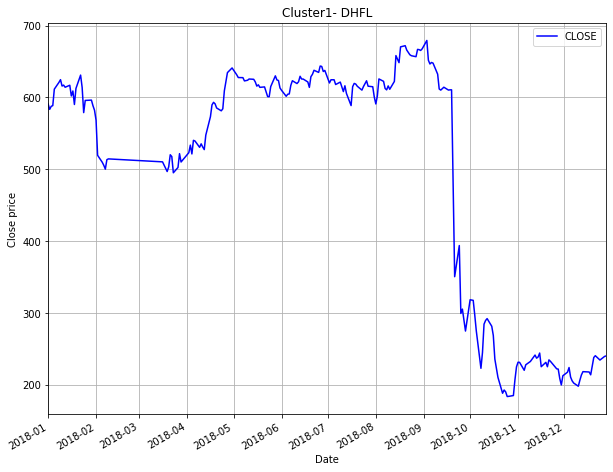

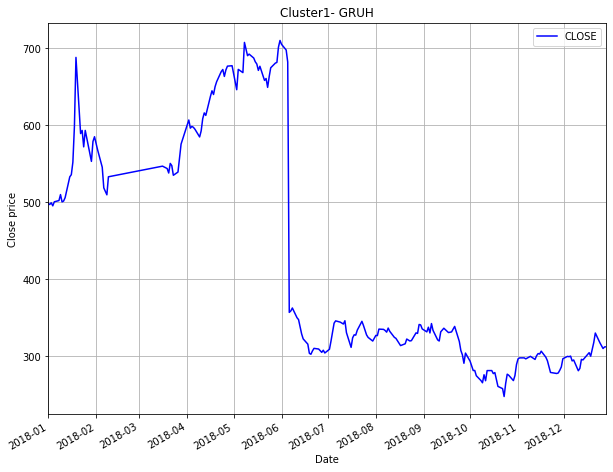

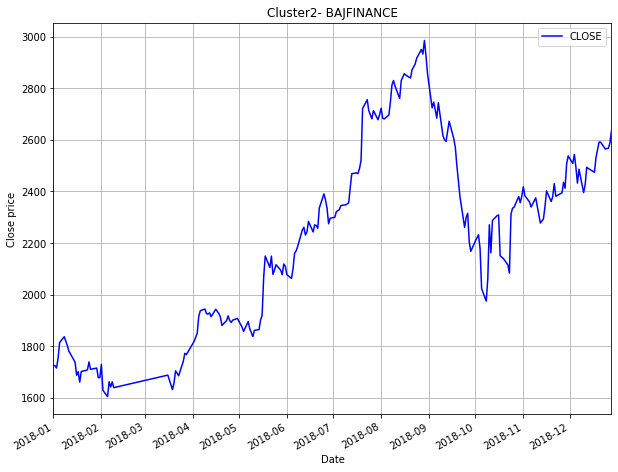

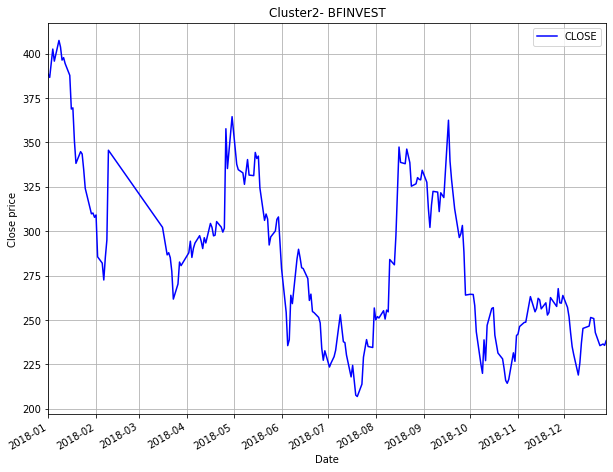

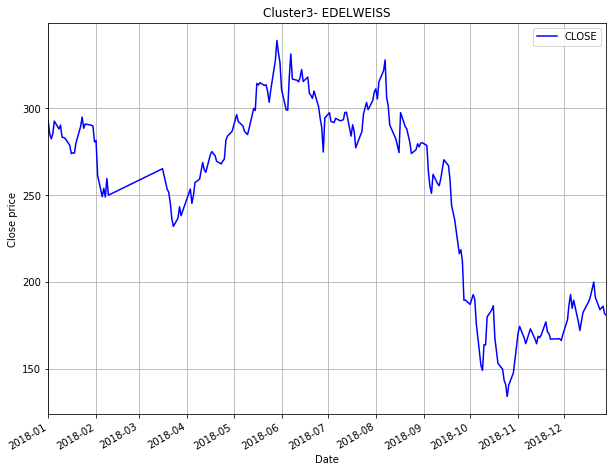

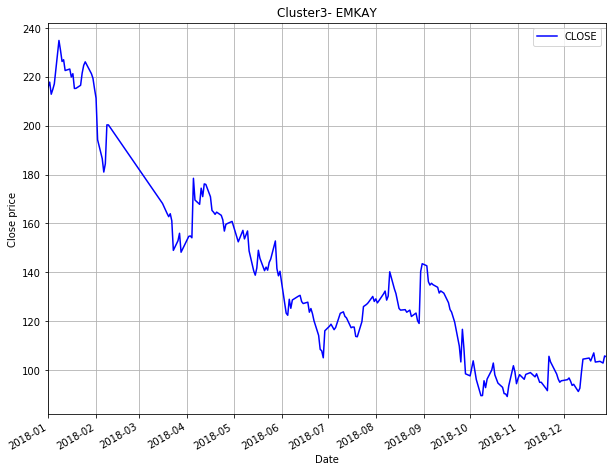

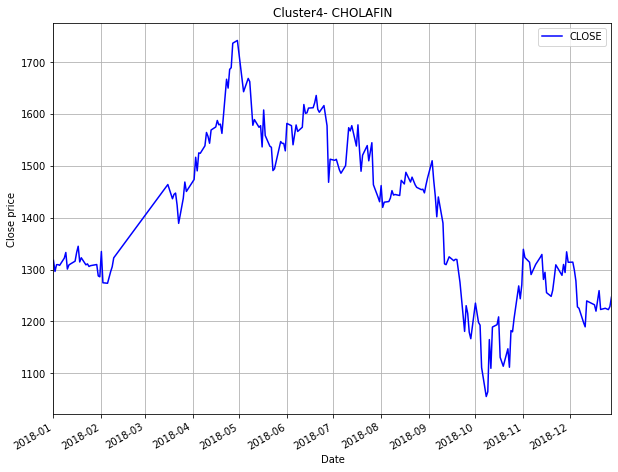

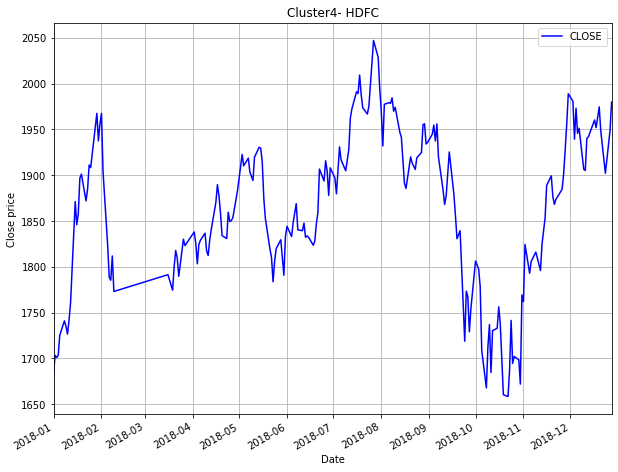

In [168]:
#fig = plt.figure(figsize = (50,25)) # width x heigh
# We use ax parameter to tell seaborn which subplot to use for this plot
k=1
for i in plot_c1:
    df= df_all[df_all.SYMBOL.isin([i])].copy()
    rcParams['figure.figsize']=10,8
    ax = df.plot(x='date',y='CLOSE',style='b',grid=True,title="Cluster1- "+str(i))
    ax.set_xlabel("Date")
    ax.set_ylabel("Close price")

for i in plot_c2:
    df= df_all[df_all.SYMBOL.isin([i])].copy()
    rcParams['figure.figsize']=10,8
    ax = df.plot(x='date',y='CLOSE',style='b',grid=True,title="Cluster2- "+str(i))
    ax.set_xlabel("Date")
    ax.set_ylabel("Close price")

for i in plot_c3:
    df= df_all[df_all.SYMBOL.isin([i])].copy()
    rcParams['figure.figsize']=10,8
    ax = df.plot(x='date',y='CLOSE',style='b',grid=True,title="Cluster3- "+str(i))
    ax.set_xlabel("Date")
    ax.set_ylabel("Close price")

for i in plot_c4:
    df= df_all[df_all.SYMBOL.isin([i])].copy()
    rcParams['figure.figsize']=10,8
    ax = df.plot(x='date',y='CLOSE',style='b',grid=True,title="Cluster4- "+str(i))
    ax.set_xlabel("Date")
    ax.set_ylabel("Close price")

In [57]:
# plt.scatter(df_norm.iloc[predicted_cluster==0,0],df_norm.iloc[predicted_cluster==0,1],s=50,c='blue',marker='v',label='culster1')
# plt.scatter(df_norm.iloc[predicted_cluster==1,0],df_norm.iloc[predicted_cluster==1,1],s=50,c='green',marker='s',label='culster2')
# plt.scatter(df_norm.iloc[predicted_cluster==2,0],df_norm.iloc[predicted_cluster==2,1],s=50,c='yellow',marker='o',label='culster3')
# plt.scatter(df_norm.iloc[predicted_cluster==3,0],df_norm.iloc[predicted_cluster==3,1],s=50,c='orange',marker='+',label='culster4')
# plt.scatter(kmodel.cluster_centers_[:,0],kmodel.cluster_centers_[:,1],s=250,c='red',marker='*',label='Centroid')
# plt.legend(scatterpoints=1)
# plt.xlabel("standard deviation")
# plt.ylabel("mean")
# plt.title('stdev v/s mean')
# plt.show()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




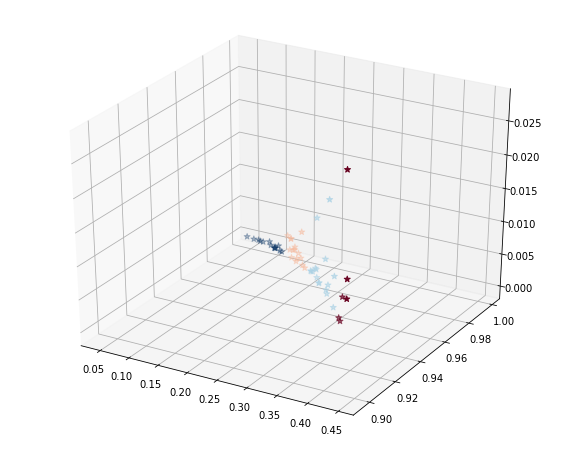

In [169]:
df_norm.head()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df_norm['stdev'])
y = np.array(df_norm['mean'])
z = np.array(df_norm['coef_variance'])

ax.scatter(x,y,z, marker="*", c=df_norm["predicted_cluster"], s=40, cmap="RdBu")

plt.show()

In [170]:

# split df into cluster groups
grouped = df_norm.groupby(['predicted_cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means



stats,stdev,mean,coef_variance
predicted_cluster,,,
0,0.381070,0.923039,0.010534
1,0.160108,0.986998,0.001707
2,0.243919,0.969305,0.002844
3,0.093098,0.995394,0.000187


In [171]:
#pip install plotly

In [172]:
import plotly
import plotly.graph_objs as go
data = [go.Heatmap( z=means.values.tolist(), 
                   y=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
                   x=['stdev',
                      'mean',
                      'coef_variance'
                     ],
                   colorscale='Viridis')]
plotly.offline.iplot(data, filename='pandas-heatmap')

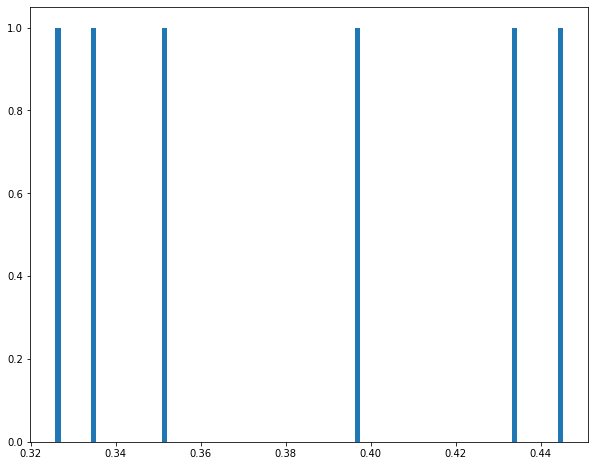

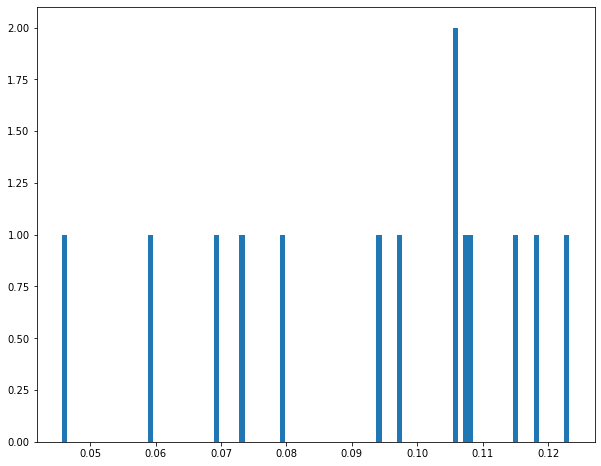

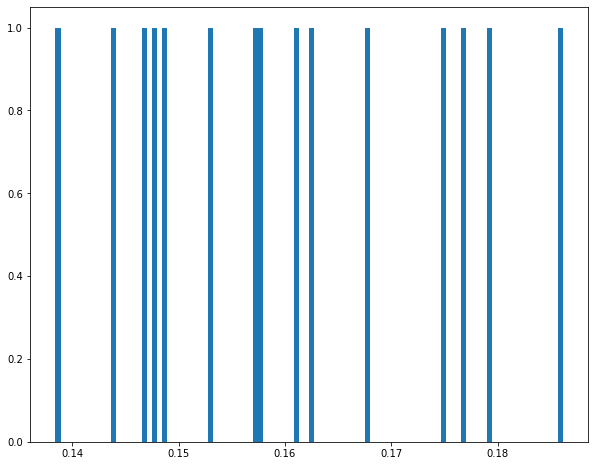

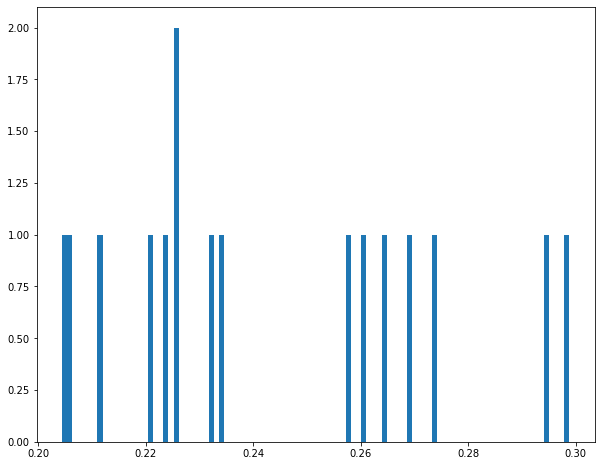

In [173]:
for i in df_norm.predicted_cluster.unique():
    x=df_norm.query(f"predicted_cluster == {i}")['stdev']
    plt.hist(x, bins = 100)
    plt.show()

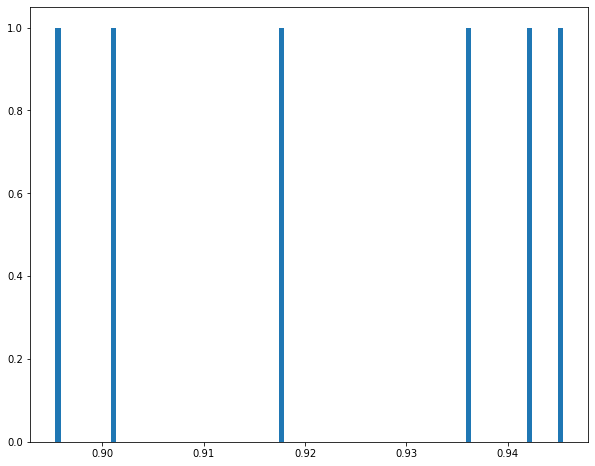

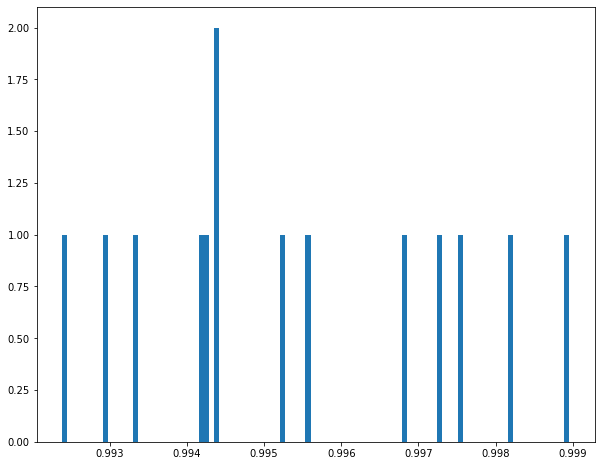

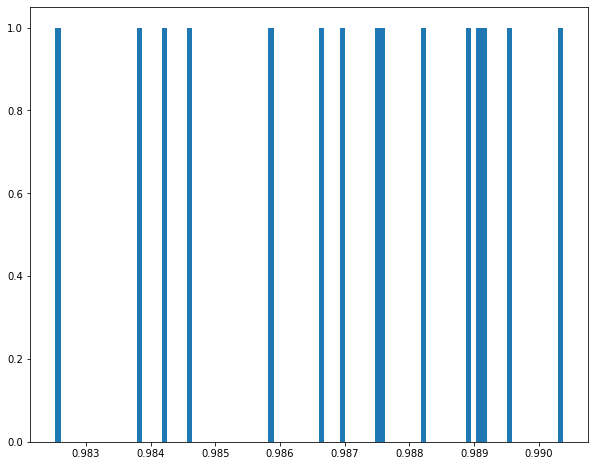

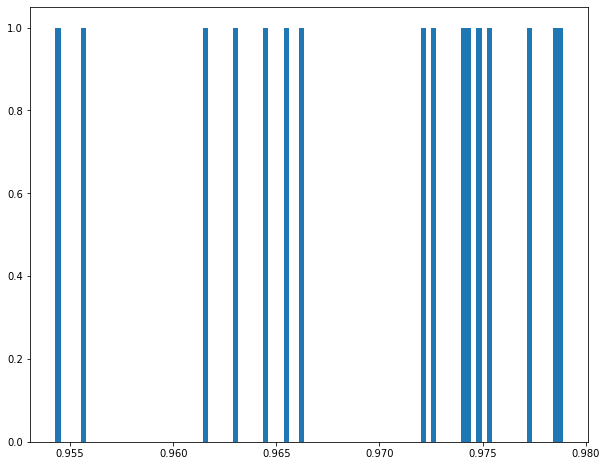

In [174]:
for i in df_norm.predicted_cluster.unique():
    x=df_norm.query(f"predicted_cluster == {i}")['mean']
    plt.hist(x, bins = 100)
    plt.show()

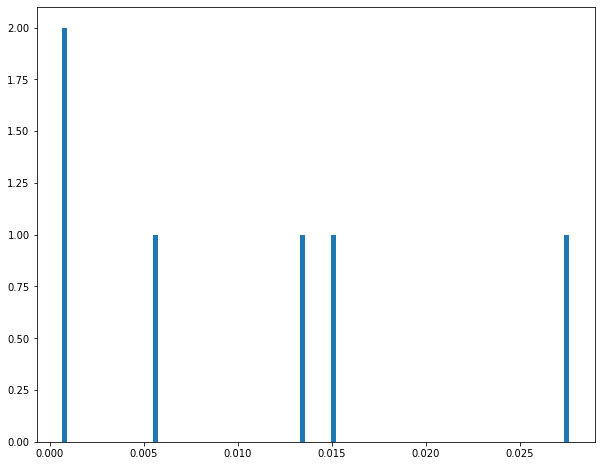

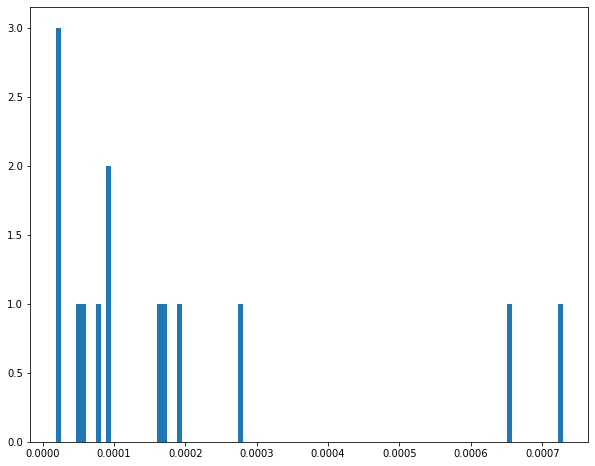

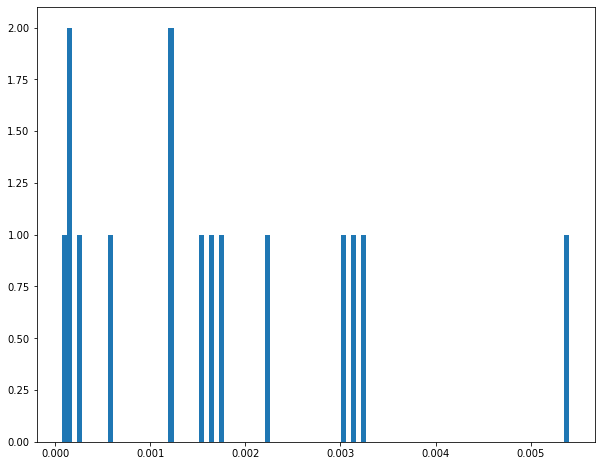

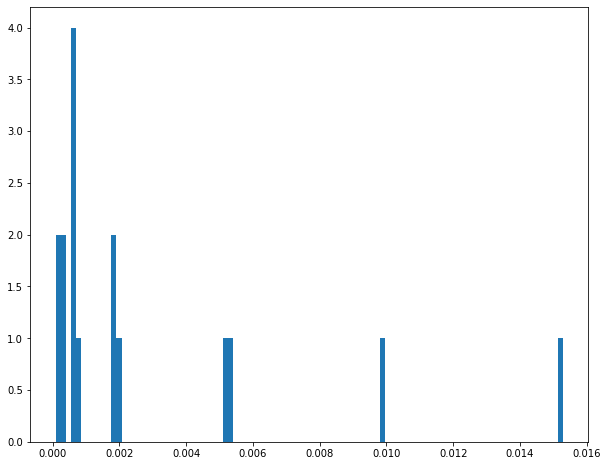

In [175]:
for i in df_norm.predicted_cluster.unique():
    x=df_norm.query(f"predicted_cluster == {i}")['coef_variance']
    plt.hist(x, bins = 100)
    plt.show()

In [176]:
df_norm.head()

stats,stdev,mean,coef_variance,predicted_cluster
ALANKIT,0.445145,0.895359,0.013327,0
BAJAJFINSV,0.105723,0.994396,0.000018,3
BAJAJHLDNG,0.059611,0.998222,0.000021,3
BAJFINANCE,0.160914,0.986968,0.000072,1
BFINVEST,0.162691,0.986677,0.000572,1


In [177]:
list_c1=list(cluster_1[:])
list_c2=list(cluster_2[:])
list_c3=list(cluster_3[:])


In [178]:
import random

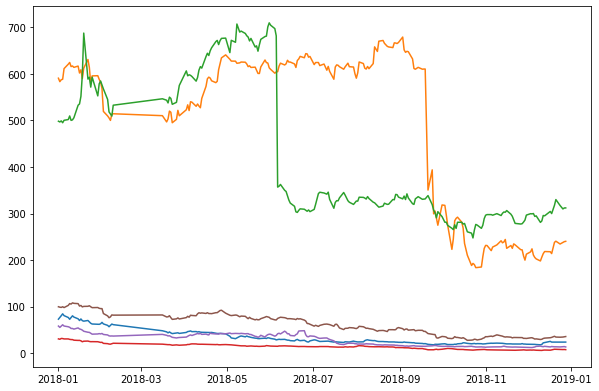

In [179]:
# We use ax parameter to tell seaborn which subplot to use for this plot

k=1
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
startindex = random.randint(0,50)
stopindex = random.randint(50,200)

for i in list_c1[startindex:stopindex]:
    df= df_all[df_all.SYMBOL.isin([i])].copy()
    df['pct_change']=df['CLOSE'].pct_change()
    ax1.plot(df.date,df['CLOSE'])



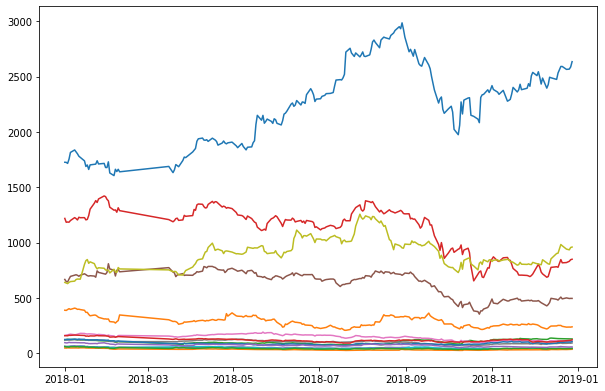

In [180]:

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
for i in list_c2[startindex:stopindex]:
    df= df_all[df_all.SYMBOL.isin([i])].copy()
    df['pct_change']=df['CLOSE'].pct_change(10)
    ax1.plot(df.date,df['CLOSE'])

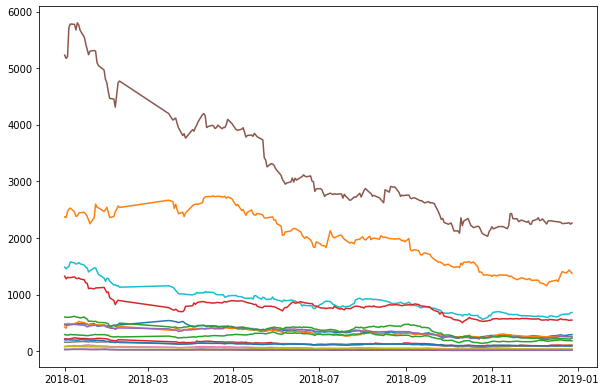

In [181]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
for i in list_c3[startindex:stopindex]:
    df= df_all[df_all.SYMBOL.isin([i])].copy()
    df['pct_change']=df['CLOSE'].pct_change(10)
    ax1.plot(df.date,df['CLOSE'])

In [184]:
df_norm.to_csv("D:\\NagarajLearning\\DataScience\\DataSets\\df_stocks_cluster_sector.csv",index=True)

In [183]:
os.getcwd()

'D:\\NagarajLearning\\DataScience\\DataSets'